# ANALYSIS OF RISING CASES OF COVID 19 IN INDIA (EDA)

In [ ]:
import pandas as pd
df_pop=pd.read_csv('/content/drive/My Drive/557629_1487040_bundle_archive/population_india_census2011.csv')
df_bed=pd.read_csv('/content/drive/My Drive/557629_1487040_bundle_archive/HospitalBedsIndia.csv')
df_Age=pd.read_csv('/content/drive/My Drive/557629_1487040_bundle_archive/AgeGroupDetails.csv')
df_ICMR=pd.read_csv('/content/drive/My Drive/557629_1487040_bundle_archive/ICMRTestingLabs.csv')
df_individ=pd.read_csv('/content/drive/My Drive/557629_1487040_bundle_archive/IndividualDetails.csv')
df_State=pd.read_csv('/content/drive/My Drive/557629_1487040_bundle_archive/StatewiseTestingDetails.csv')
df_covid=pd.read_csv('/content/drive/My Drive/557629_1487040_bundle_archive/covid_19_india.csv')

POPULATION CENSUS DATAFRAME 


Extract population and state/ union territory, Analyse the percent of 
active or total covid cases wrt the population of each state and to check if the data follows a particular trend. 

In [ ]:

df_population_analysis=df_pop[['State / Union Territory','Population','Rural population','Urban population']]

Check for NaN values

In [ ]:
df_pop.isna().sum()

Sno                        0
State / Union Territory    0
Population                 0
Rural population           0
Urban population           0
Area                       0
Density                    0
Gender Ratio               0
dtype: int64

In [ ]:
pop_visualize=df_population_analysis.sort_values(by=['Population'])

In [ ]:
pop_visualize.head(10)

,index,State / Union Territory,Population,Rural population,Urban population
0,35,Lakshadweep,64473,14141,50332
1,34,Ladakh,274000,43840,230160
2,33,Andaman and Nicobar Islands,380581,237093,143488
3,32,Dadra and Nagar Haveli and Daman and Diu,585764,243510,342254
4,27,Sikkim,610577,456999,153578
5,31,Chandigarh,1055450,28991,1026459
6,26,Mizoram,1097206,525435,571771
7,30,Puducherry,1247953,395200,852753
8,25,Arunachal Pradesh,1383727,1066358,317369
9,24,Goa,1458545,551731,906814


In [ ]:
pop_visualize=pop_visualize.reset_index()

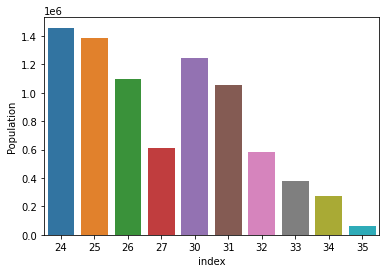

In [ ]:
import seaborn as sns
ax = sns.barplot(x="index", y="Population", data=pop_visualize.head(10))

In [ ]:
pop_visualize.tail(10)

,index,State / Union Territory,Population,Rural population,Urban population
26,9,Andhra Pradesh,49577103,34966693,14610410
27,8,Gujarat,60439692,34694609,25745083
28,7,Karnataka,61095297,37469335,23625962
29,6,Rajasthan,68548437,51500352,17048085
30,5,Tamil Nadu,72147030,37229590,34917440
31,4,Madhya Pradesh,72626809,52557404,20069405
32,3,West Bengal,91276115,62183113,29093002
33,2,Bihar,104099452,92341436,11758016
34,1,Maharashtra,112374333,61556074,50818259
35,0,Uttar Pradesh,199812341,155317278,44495063


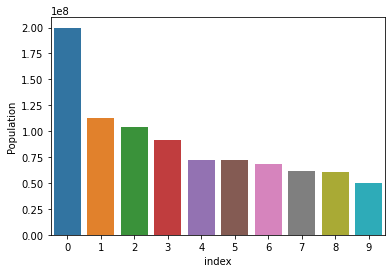

In [ ]:
ax = sns.barplot(x="index", y="Population", data=pop_visualize.tail(10))

In [ ]:
df_time_covid=df_covid.tail(35)

In [ ]:
df_time_covid=df_time_covid.reset_index()

In [ ]:
df_filtered = df_population_analysis[df_population_analysis['State / Union Territory']!='Lakshadweep']

In [ ]:
df_filtered=df_filtered.sort_values(by=['State / Union Territory'])

In [ ]:
df_filtered=df_filtered.reset_index()

Correlation Between Total Population and Confirmed Cases

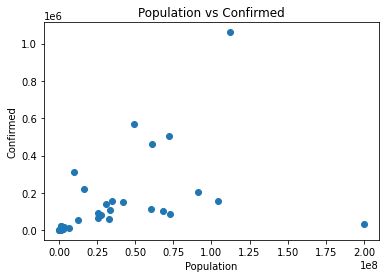

In [ ]:
import matplotlib.pyplot as plt


plt.title("Population vs Confirmed")
plt.xlabel("Population")
plt.ylabel("Confirmed")
plt.scatter(df_filtered['Population'],df_time_covid['Confirmed'])
plt.show()

In [ ]:
data1=df_filtered['Population']
data2=df_time_covid['Confirmed']
from numpy import cov
covariance = cov(data1, data2)

In [ ]:
covariance

array([[1.87440586e+15, 4.16334601e+12],
       [4.16334601e+12, 4.67443717e+10]])

In [ ]:
from scipy.stats import pearsonr
corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.445


In [ ]:
ratio=[]
name=[]
name_enc=[]
for i in range(len(df_filtered)):
  name.append(df_filtered['State / Union Territory'][i])
  name_enc.append(i)
  ratio.append(int(df_time_covid['Confirmed'][i])/int(df_filtered['Population'][i]))

  

In [ ]:
from matplotlib import pyplot as plt

<BarContainer object of 35 artists>

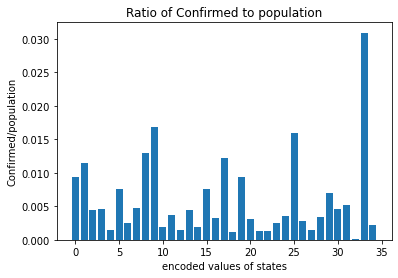

In [ ]:
plt.title("Ratio of Confirmed to population")
plt.xlabel("encoded values of states")
plt.ylabel("Confirmed/population")
plt.bar(name_enc,ratio)

Places with lower population have higher confirmed to population cases

In [ ]:
name[33],name[25],name[9]

('Uttarakhand', 'Puducherry', 'Goa')

Places with Higher population have a lower ratio

In [ ]:
name[32]

'Uttar Pradesh'

 

BEDS DATAFRAME

 Analyse the availability of hospital beds with the recovery rate 





In [ ]:
df_time_covid.head()

,index,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,6246,6247,14/09/20,8:00 AM,Andaman and Nicobar Islands,-,-,3243,51,3546
1,6247,6248,14/09/20,8:00 AM,Andhra Pradesh,-,-,467139,4912,567123
2,6248,6249,14/09/20,8:00 AM,Arunachal Pradesh,-,-,4379,10,6121
3,6249,6250,14/09/20,8:00 AM,Assam,-,-,113133,469,141763
4,6250,6251,14/09/20,8:00 AM,Bihar,-,-,143350,822,158285


In [ ]:
df_bed = df_bed[df_bed['State/UT']!='Daman & Diu']
df_bed = df_bed[df_bed['State/UT']!='All India']

In [ ]:
df_bed.reset_index().head()

,index,Sno,State/UT,NumPrimaryHealthCenters_HMIS,NumCommunityHealthCenters_HMIS,NumSubDistrictHospitals_HMIS,NumDistrictHospitals_HMIS,TotalPublicHealthFacilities_HMIS,NumPublicBeds_HMIS,NumRuralHospitals_NHP18,NumRuralBeds_NHP18,NumUrbanHospitals_NHP18,NumUrbanBeds_NHP18
0,0,1,Andaman & Nicobar Islands,27,4,NaN,3,34,1246,27,575,3,500
1,1,2,Andhra Pradesh,1417,198,31.0,20,1666,60799,193,6480,65,16658
2,2,3,Arunachal Pradesh,122,62,NaN,15,199,2320,208,2136,10,268
3,3,4,Assam,1007,166,14.0,33,1220,19115,1176,10944,50,6198
4,4,5,Bihar,2007,63,33.0,43,2146,17796,930,6083,103,5936


Check for NaN values

In [ ]:
df_bed.isna().sum()

Sno                                 0
State/UT                            0
NumPrimaryHealthCenters_HMIS        0
NumCommunityHealthCenters_HMIS      0
NumSubDistrictHospitals_HMIS        6
NumDistrictHospitals_HMIS           0
TotalPublicHealthFacilities_HMIS    0
NumPublicBeds_HMIS                  0
NumRuralHospitals_NHP18             0
NumRuralBeds_NHP18                  0
NumUrbanHospitals_NHP18             0
NumUrbanBeds_NHP18                  0
dtype: int64

In [ ]:
len(df_bed)

35

There are 6 NaN values in NumSubDistrictHospitals_HMIS

In [ ]:
df_bed.fillna(df_bed['NumSubDistrictHospitals_HMIS'].mean(),inplace=True)

In [ ]:
df_bed.isna().sum()

Sno                                 0
State/UT                            0
NumPrimaryHealthCenters_HMIS        0
NumCommunityHealthCenters_HMIS      0
NumSubDistrictHospitals_HMIS        0
NumDistrictHospitals_HMIS           0
TotalPublicHealthFacilities_HMIS    0
NumPublicBeds_HMIS                  0
NumRuralHospitals_NHP18             0
NumRuralBeds_NHP18                  0
NumUrbanHospitals_NHP18             0
NumUrbanBeds_NHP18                  0
dtype: int64

We want to analyse all the columns of the df_bed with cured column of covid. Hence we need to perform dimensionality reduction

In [ ]:
df_bed['NumPrimaryHealthCenters_HMIS']=df_bed['NumPrimaryHealthCenters_HMIS'].str.replace(',','')
df_bed['NumPrimaryHealthCenters_HMIS']=df_bed['NumPrimaryHealthCenters_HMIS'].astype(float)

In [ ]:
features=['NumPrimaryHealthCenters_HMIS','NumCommunityHealthCenters_HMIS','NumSubDistrictHospitals_HMIS','NumDistrictHospitals_HMIS','TotalPublicHealthFacilities_HMIS','NumPublicBeds_HMIS','NumRuralHospitals_NHP18','NumRuralBeds_NHP18','NumUrbanHospitals_NHP18','NumUrbanBeds_NHP18']

In [ ]:
Y=['Cured']

In [ ]:
X=df_bed.loc[:,features].values

In [ ]:
Y_targ=df_time_covid.loc[:,Y].values

In [ ]:
from sklearn.preprocessing import StandardScaler
X=StandardScaler().fit_transform(X)

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=1)
principalComponents=pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents,columns = ['principal component 1'])

In [ ]:
principalDf.head()

,principal component 1
0,-2.414757
1,0.759694
2,-1.963416
3,0.021351
4,0.545001


The Cured column in df_time_covid is positively skewed

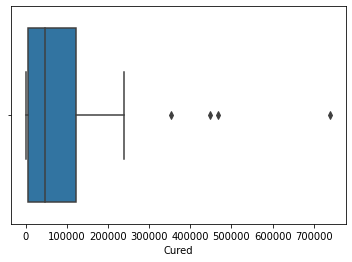

In [ ]:
ax = sns.boxplot(x=df_time_covid["Cured"])

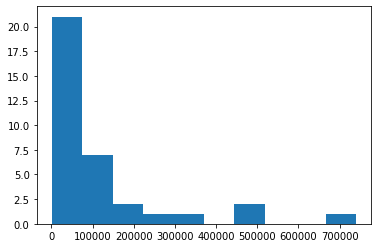

In [ ]:
import math
plt.hist(df_time_covid["Cured"], bins = 10)
plt.show()

Correlation of facilities with cured cases

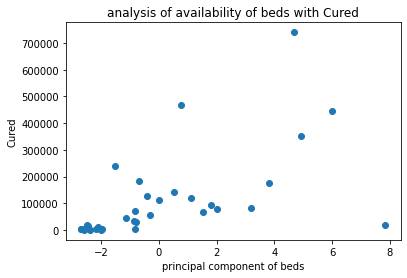

In [ ]:
plt.title("analysis of availability of beds with Cured")
plt.xlabel("principal component of beds")
plt.ylabel("Cured")
plt.scatter(principalDf['principal component 1'],df_time_covid['Cured'])
plt.show()

In [ ]:
data1=principalDf['principal component 1']
data2=df_time_covid['Cured']
from numpy import cov
covariance = cov(data1, data2)

In [ ]:
covariance

array([[7.68765168e+00, 2.66704782e+05],
       [2.66704782e+05, 2.67291795e+10]])

In [ ]:
from scipy.stats import pearsonr
corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.588


In [ ]:
df_State.head()

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0


In [ ]:
df_State = df_State[df_State['Date']=='2020-09-13']

In [ ]:
df_State.reset_index()

,index,Date,State,TotalSamples,Negative,Positive
0,277,2020-09-13,Andhra Pradesh,4599826.0,4032703,NaN
1,424,2020-09-13,Arunachal Pradesh,205519.0,192960,NaN
2,562,2020-09-13,Assam,2717795.0,NaN,NaN
3,720,2020-09-13,Bihar,4884417.0,NaN,NaN
4,877,2020-09-13,Chandigarh,49451.0,41168,NaN
5,1028,2020-09-13,Chhattisgarh,784483.0,NaN,NaN
6,1318,2020-09-13,Delhi,2139432.0,NaN,NaN
7,1470,2020-09-13,Goa,225051.0,NaN,NaN
8,1628,2020-09-13,Gujarat,3288811.0,NaN,113662.0
9,1789,2020-09-13,Haryana,1490034.0,1389712,NaN


In [ ]:
for i in df_bed['State/UT']:
  if i not in list(df_State['State']):
    print(i)
   
    

Andaman & Nicobar Islands
Dadra & Nagar Haveli
Jammu & Kashmir
Lakshadweep
Meghalaya


In [ ]:
df_bed = df_bed[df_bed['State/UT']!='Andaman & Nicobar Islands']
df_bed = df_bed[df_bed['State/UT']!='Dadra & Nagar Haveli']
df_bed = df_bed[df_bed['State/UT']!='Jammu & Kashmir']
df_bed = df_bed[df_bed['State/UT']!='Lakshadweep']
df_bed = df_bed[df_bed['State/UT']!='Meghalaya']

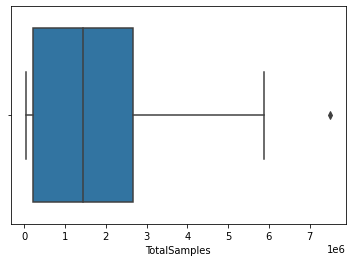

In [ ]:
import seaborn as sns
ax = sns.boxplot(x=df_State["TotalSamples"])

In [ ]:
data1=principalDf['principal component 1'][:32]
data2=df_State["TotalSamples"]
from numpy import cov
covariance = cov(data1, data2)

In [ ]:
covariance

array([[5.79911837e+00, 4.56952996e+05],
       [4.56952996e+05, 3.89487559e+12]])

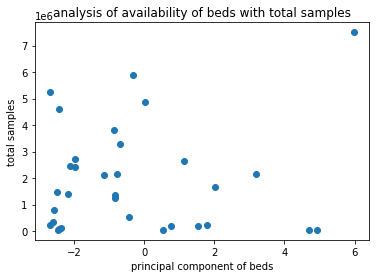

In [ ]:
plt.title("analysis of availability of beds with total samples")
plt.xlabel("principal component of beds")
plt.ylabel("total samples")
plt.scatter(principalDf['principal component 1'][:32],df_State["TotalSamples"][:32])
plt.show()

In [ ]:
from scipy.stats import pearsonr
corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.096


Analysis of Age DataFrame

In [ ]:
df_Age

,Sno,AgeGroup,TotalCases,Percentage
0,1,0-9,22,3.18%
1,2,10-19,27,3.90%
2,3,20-29,172,24.86%
3,4,30-39,146,21.10%
4,5,40-49,112,16.18%
5,6,50-59,77,11.13%
6,7,60-69,89,12.86%
7,8,70-79,28,4.05%
8,9,>=80,10,1.45%
9,10,Missing,9,1.30%


In [ ]:
df_Age.isna().sum()

Sno           0
AgeGroup      0
TotalCases    0
Percentage    0
dtype: int64

In [ ]:
age_enc=[]
for i in range(len(df_Age)):
  age_enc.append(i+1)

In [ ]:
perc=[]
for i in list(df_Age['Percentage']):
  i=i.strip('%')
  perc.append(float(i))


<BarContainer object of 10 artists>

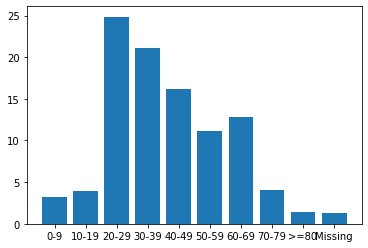

In [ ]:
plt.bar(list(df_Age['AgeGroup']),perc)

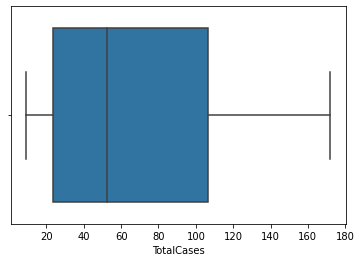

In [ ]:
ax = sns.boxplot(x=df_Age['TotalCases'])


Positively skewed

ANALYSIS OF INDIVIDUAL CASES

In [ ]:
df_individ.head()

,id,government_id,diagnosed_date,age,gender,detected_city,detected_district,detected_state,nationality,current_status,status_change_date,notes
0,0,KL-TS-P1,30/01/2020,20,F,Thrissur,Thrissur,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
1,1,KL-AL-P1,02/02/2020,NaN,NaN,Alappuzha,Alappuzha,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
2,2,KL-KS-P1,03/02/2020,NaN,NaN,Kasaragod,Kasaragod,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
3,3,DL-P1,02/03/2020,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,India,Recovered,15/03/2020,"Travelled from Austria, Italy"
4,4,TS-P1,02/03/2020,24,M,Hyderabad,Hyderabad,Telangana,India,Recovered,02/03/2020,"Travelled from Dubai to Bangalore on 20th Feb,..."


In [ ]:
df_individ['notes'] = df_individ['notes'].fillna(df_individ['notes'].mode()[0])


In [ ]:
df_individ.isna().sum()

id                        0
government_id         25185
diagnosed_date            0
age                   25836
gender                22869
detected_city         25832
detected_district      6984
detected_state            0
nationality           25473
current_status            0
status_change_date      402
notes                     0
dtype: int64

In [ ]:
df_individ['notes'].mode()[0]

'Details awaited'

Most of the individual details unknown

In [ ]:
df_individ['detected_state'].mode()

0    Maharashtra
dtype: object

Maharashtra has the most individual cases
